### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import os 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from PIL import Image
import itertools
import warnings
warnings.filterwarnings('ignore')
import io

In [2]:
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization

In [3]:
print('#'*127)
print('#'*127)
print('#'*127)

###############################################################################################################################
###############################################################################################################################
###############################################################################################################################


### Data

In [4]:
df = pd.read_csv(r'WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [5]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [6]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [7]:
print('#'*127)
print('#'*127)
print('#'*127)

###############################################################################################################################
###############################################################################################################################
###############################################################################################################################


### 1.Data overview

In [8]:
print('Rows    :', df.shape[0])
print('Columns :', df.shape[1])
print('\nFeatures: \n', df.columns.tolist())
print('\nMissig values : ', df.isnull().sum().values.sum())
print('\nUnique values : \n', df.nunique())

Rows    : 7043
Columns : 21

Features: 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Missig values :  0

Unique values : 
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [9]:
print('#'*127)
print('#'*127)
print('#'*127)

###############################################################################################################################
###############################################################################################################################
###############################################################################################################################


### 2.Data Manipulation

In [10]:
df['TotalCharges'].unique()

df.query('TotalCharges == " "').head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No


In [11]:
#Replacing spaces with null values in total charges column

df['TotalCharges'] = df['TotalCharges'].replace(" ", np.nan)

In [12]:
df.query('TotalCharges == " "').head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [13]:
df.shape

(7043, 21)

In [14]:
df = df[df['TotalCharges'].notnull()]
df.reset_index()[df.columns]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [15]:
df.shape

(7032, 21)

In [16]:
# Convert to float

df['TotalCharges'] = df['TotalCharges'].astype(float)

In [17]:
# Replace 'No Internet Service' to NO for the following columns

replace_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']

for i in replace_cols:
    df[i] = df[i].replace({'No internet service' : 'No'})
    
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [18]:
# replace columns

df['SeniorCitizen'] = df['SeniorCitizen'].replace({1: 'Yes', 0:'No'})

In [19]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [20]:
# Tenure to categorical column

def tenure_lab(df):
    if df['tenure'] <=12:
        return "Tenure_0-12"
    elif (df['tenure'] > 12) & (df['tenure'] <=24):
        return "Tenure_12-24"
    elif (df['tenure'] > 24) & (df['tenure'] <=48):
        return "Tenure_24-48"
    elif (df['tenure'] > 48) & (df['tenure'] <=60):
        return "Tenure_48-60"
    elif (df['tenure'] > 60):
        return "Tenure_gt_60"
    
df['tenure_group'] = df.apply(lambda df:tenure_lab(df), axis =1)

In [21]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Tenure_0-12
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,Tenure_24-48
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Tenure_0-12


In [22]:
df1 = df.copy()

In [23]:
# separting churn and non-churners

churn = df1[df1['Churn'] == 'Yes']
non_churn = df1[df1['Churn'] == 'No']

In [24]:
churn[['customerID','Churn']].head()

,customerID,Churn
2,3668-QPYBK,Yes
4,9237-HQITU,Yes
5,9305-CDSKC,Yes
8,7892-POOKP,Yes
13,0280-XJGEX,Yes


In [25]:
non_churn[['customerID','Churn']].head()

,customerID,Churn
0,7590-VHVEG,No
1,5575-GNVDE,No
3,7795-CFOCW,No
6,1452-KIOVK,No
7,6713-OKOMC,No


In [26]:
df1.nunique()

customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         2
OnlineBackup           2
DeviceProtection       2
TechSupport            2
StreamingTV            2
StreamingMovies        2
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
tenure_group           5
dtype: int64

In [27]:
df1.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
tenure_group         object
dtype: object

In [28]:
# separting categorical and numerical values

Id_col = ['customerID']
target_col = ['Churn']
cat_cols = df1.nunique()[df1.nunique()<6].keys().tolist()
cat_cols = [x for x in cat_cols if x not in target_col]
num_cols = [x for x in df.columns if x not in cat_cols+target_col+Id_col]

In [29]:
cat_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'tenure_group']

In [30]:
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

In [31]:
print('#'*127)
print('#'*127)
print('#'*127)

###############################################################################################################################
###############################################################################################################################
###############################################################################################################################


### 3.Exploratory Data Analysis

#### 3.1 Customer attrition in data 

##### Method 1

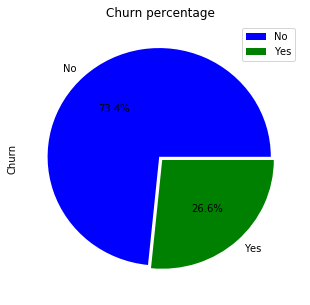

In [32]:
a = round(df1.Churn.value_counts()/df1.shape[0],3) * 100
a.plot(kind='pie', figsize=(5,5),autopct = '%1.1f%%',explode = (0.02, 0.02),colors=['b','g'])
plt.title('Churn percentage')
plt.legend()
plt.show()

##### Method 2

In [33]:
# labels
lab = df1['Churn'].value_counts().keys().tolist()
val = df1['Churn'].value_counts().values.tolist()

trace = go.Pie(labels=lab,
               values=val,
               marker=dict(colors=['royalblue','lime'], 
                           line=dict(color='white',width=0.5)),
               rotation=90,
               hoverinfo="label+value+text",
               hole=.5)

layout = go.Layout(dict(title="Customer attrition in data",plot_bgcolor="rgb(243,243,243)",paper_bgcolor="rgb(243,243,243)"))

data = [trace]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

### 3.2 Variables distribution in customer attrition

#### Display chart on categorical data

##### Method 1

In [34]:
def plot_pie(column):
    trace1 = go.Pie(labels=churn[column].value_counts().keys().tolist(),
                    values=churn[column].value_counts().values.tolist(),
                    marker=dict(line=dict(width=2,color="rgb(243,243,243)")),
                    domain=dict(x=[0,.48]),
                    hole=0.6,
                    hoverinfo="label+percent+name")
    
    trace2 = go.Pie(labels=non_churn[column].value_counts().keys().tolist(),
                    values=non_churn[column].value_counts().values.tolist(),
                    marker=dict(line=dict(width=2,color="rgb(243,243,243)")),
                    domain=dict(x=[.52,1]),
                    hole=0.6,
                    hoverinfo="label+percent+name")
    
    layout = go.Layout(dict(title=column + " distribution in customer attrition",
                            plot_bgcolor="rgb(243,243,243)",
                            paper_bgcolor="rgb(243,243,243)"),
                            annotations =[dict(text="churn customers",x=.15,y=.5,showarrow=False,font=dict(size=13)),
                                          dict(text="Non churn customers",x=.88,y=.5,showarrow=False,font=dict(size=13))])
    
    data = [trace1,trace2]
    fig = go.Figure(data=data,layout=layout)
    py.iplot(fig)

In [35]:
plot_pie("gender")

In [36]:
cat_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'tenure_group']

In [37]:
for i in cat_cols:
    plot_pie(i)

##### Method 2

In [38]:
def plot_histogram(column):
    aggre = df1.groupby(['Churn',column])[column].agg({'Frequency':'count'})
    final = aggre.groupby(level=0).apply(lambda x: x / float(x.sum())*100)
    ax = final.Frequency.unstack().plot.bar(stacked=True,figsize=(15,5))
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.annotate('{:.1f} %'.format(height), (p.get_x()+.15*width, p.get_y()+.4*height))
    plt.title(column + ' distribution in customer attribution')
    plt.show()
    

In [39]:
cat_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'tenure_group']

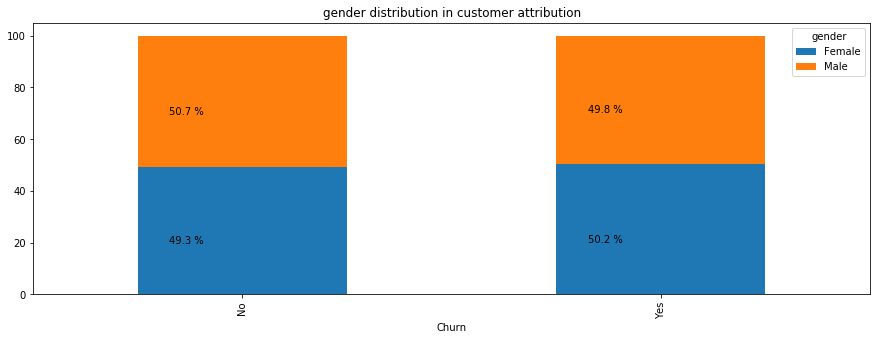

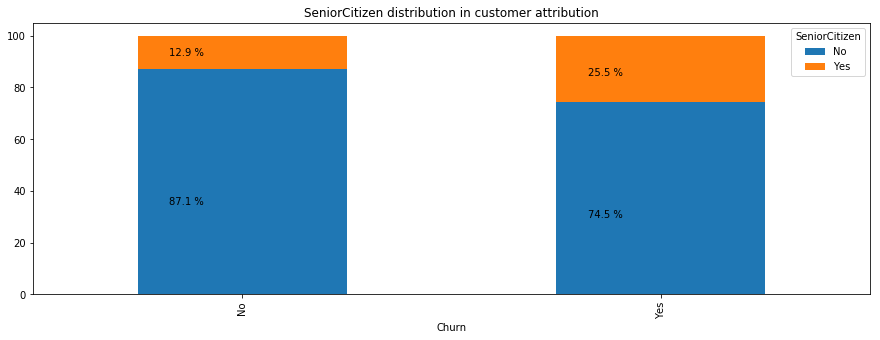

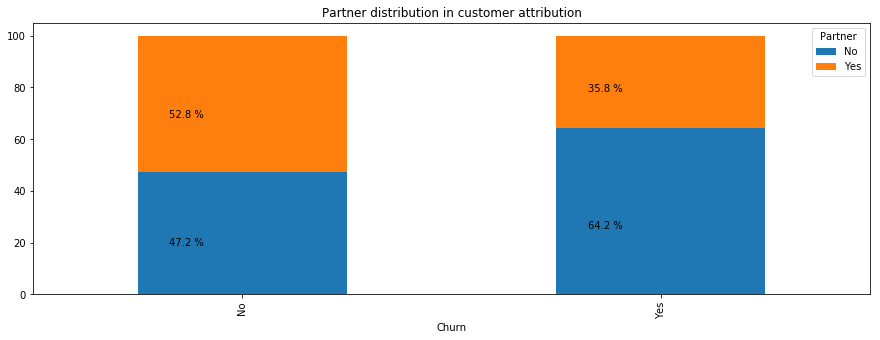

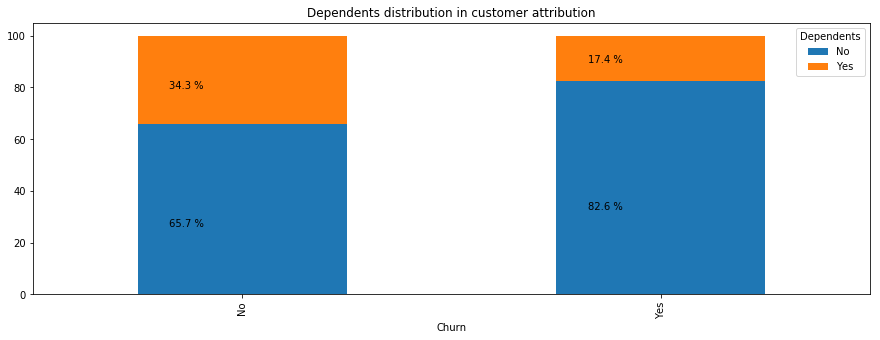

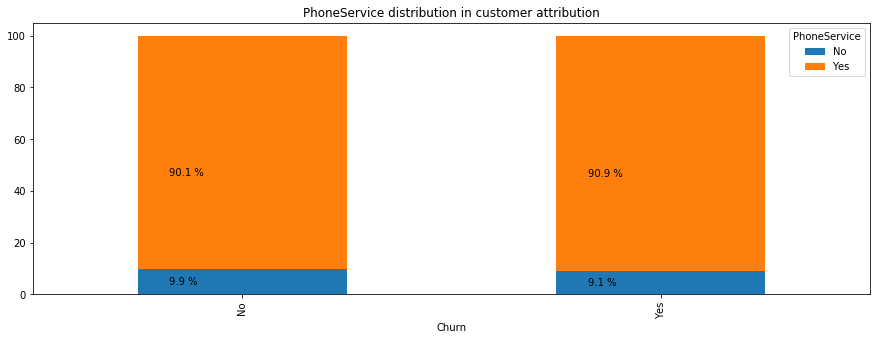

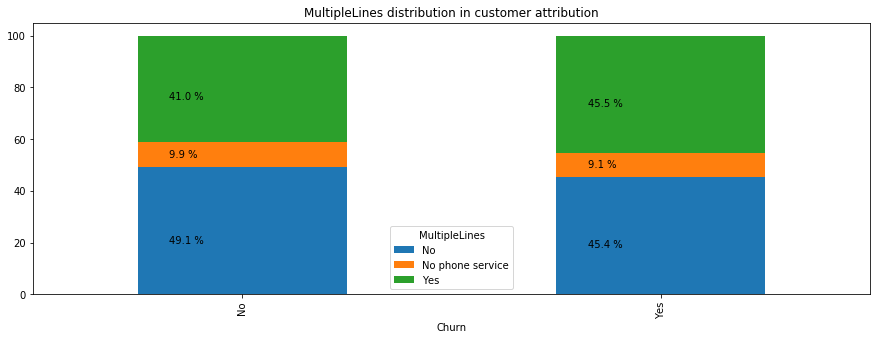

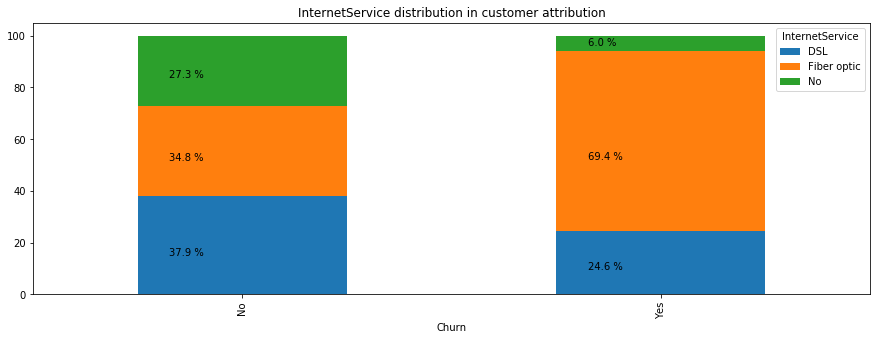

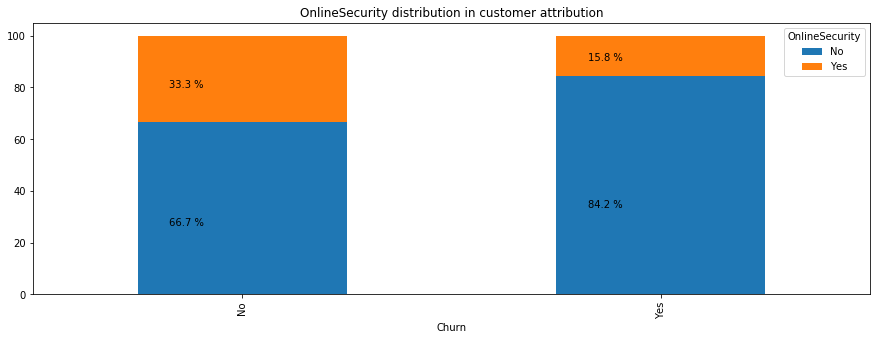

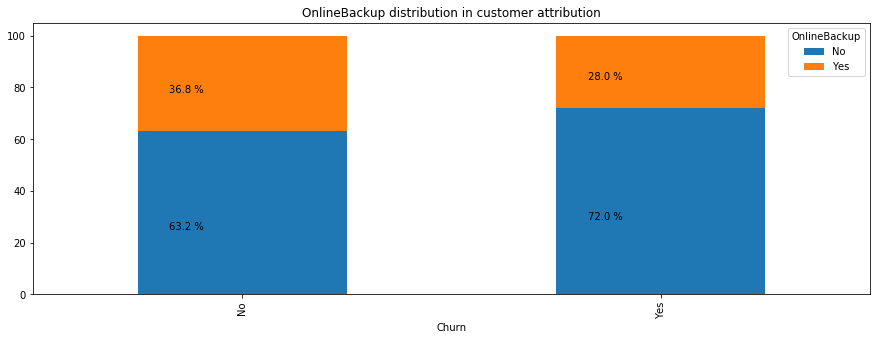

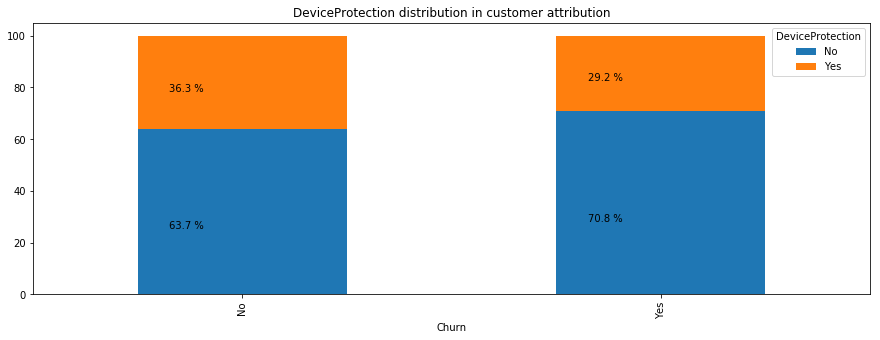

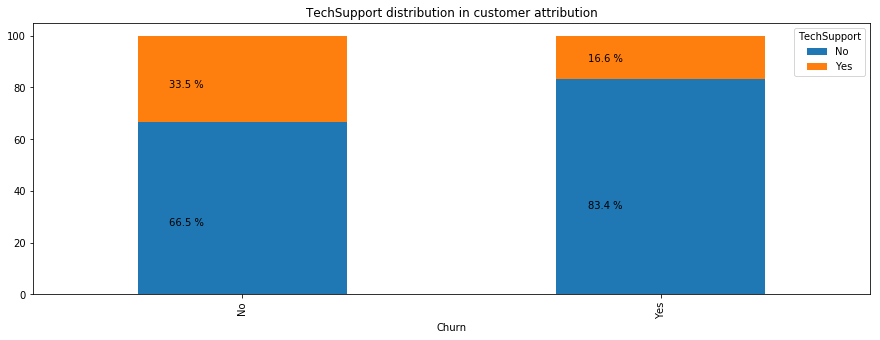

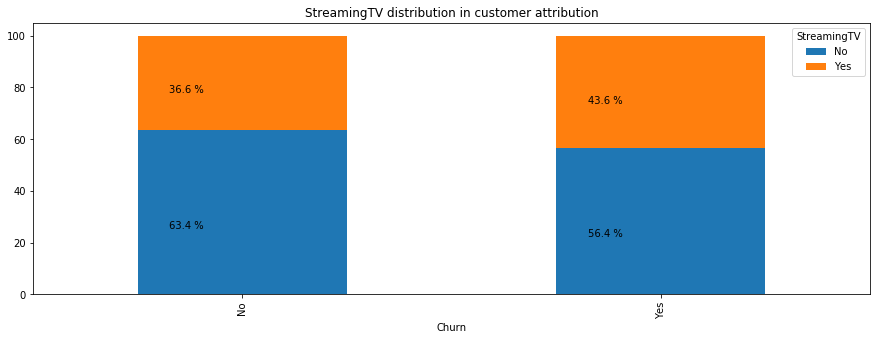

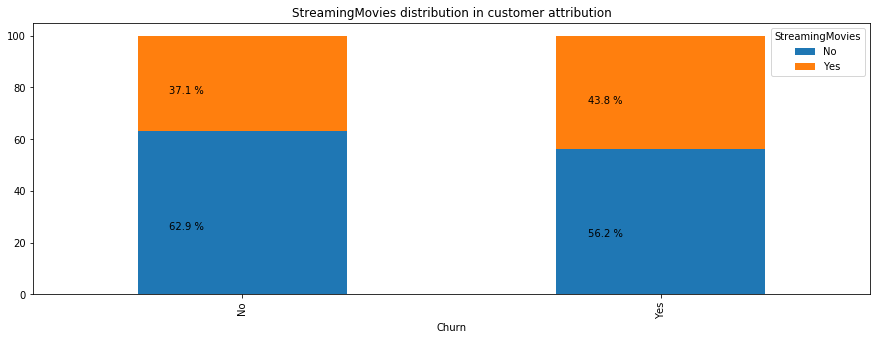

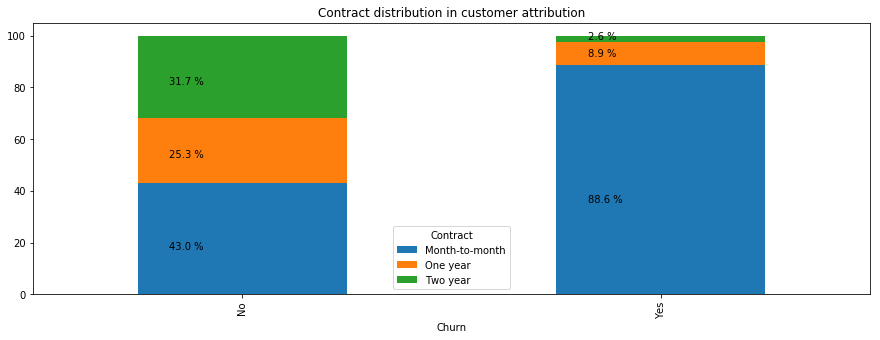

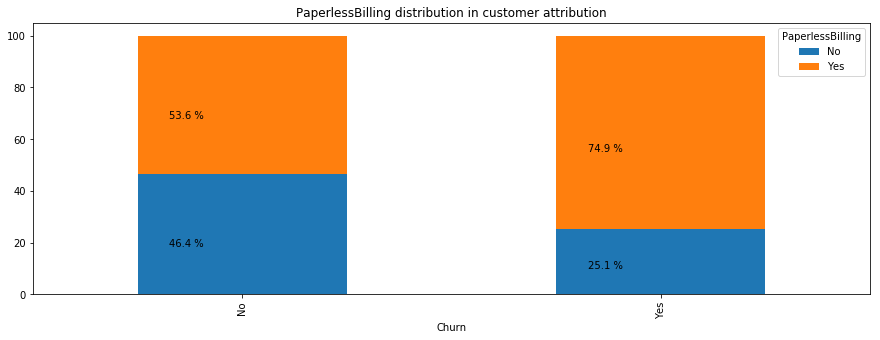

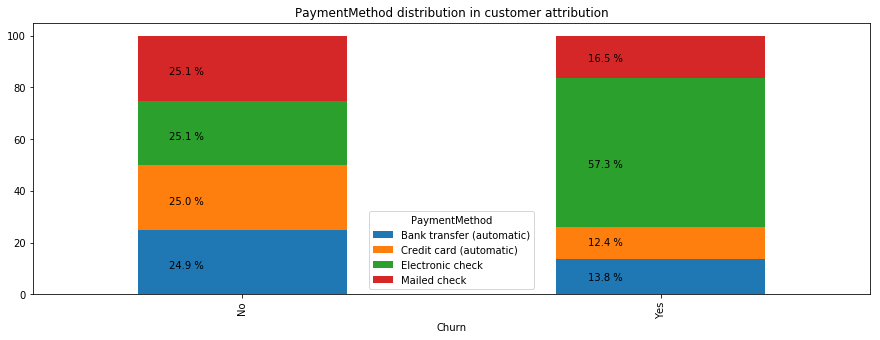

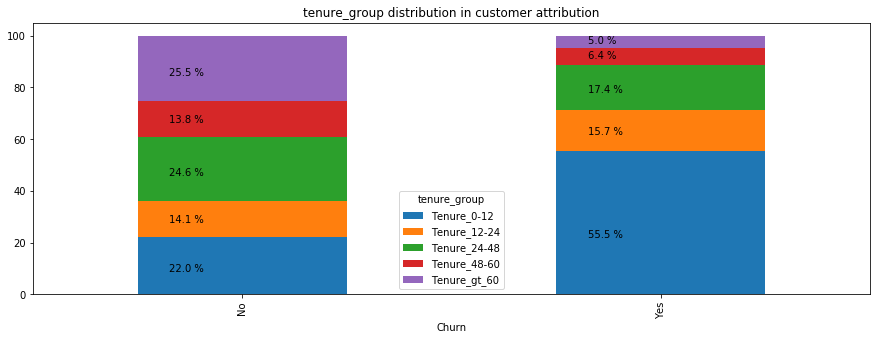

In [40]:
#for all categorical columns plot pie
for i in cat_cols :
    plot_histogram(i)

#### Display chart on numerical data

##### Method 1

In [41]:
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

In [42]:
def plot_hist(column):
    churn.groupby(column)['Churn'].size().plot()
    plt.title(column + '-Churn')
    plt.show()
    non_churn.groupby(column)['Churn'].size().plot()
    plt.title(column + ' -Non_Churn')
    plt.show()

In [43]:
# plot_hist('MonthlyCharges')

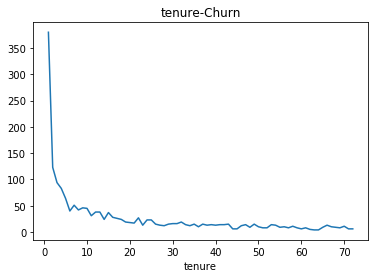

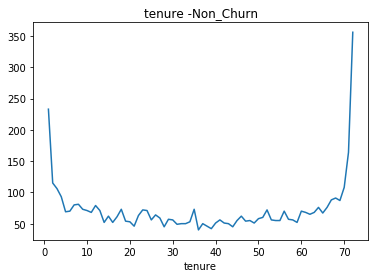

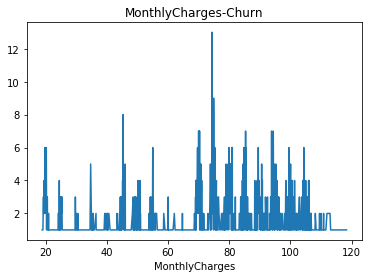

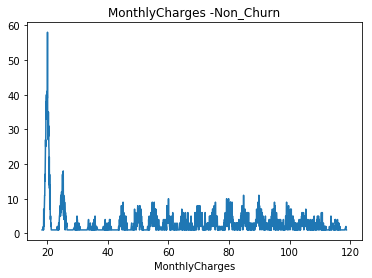

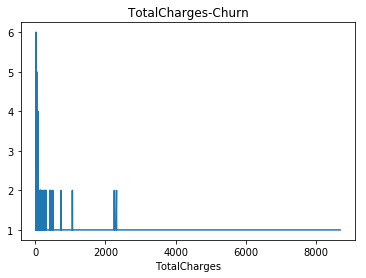

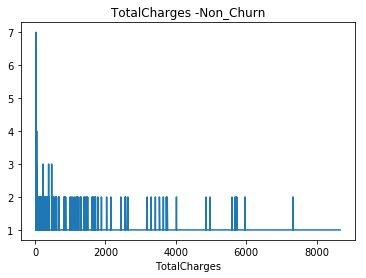

In [44]:
#for all categorical columns plot pie
for i in num_cols :
    plot_hist(i)

##### Method 2

In [45]:
def histogram(column):
    trace1 = go.Histogram(x=churn[column],
                          histnorm = 'percent',
                          name='churn customers', 
                          marker = dict(line=dict(width=5,color='blue')),
                          opacity=0.9)

    trace2 = go.Histogram(x=non_churn[column],
                          histnorm = 'percent',
                          name='Non churn customers', 
                          marker = dict(line=dict(width=5,color='lime')),
                          opacity=0.9)
    
    data = [trace1, trace2]
    
    layout = go.Layout(title = column + " distribution in customer attrition",
                       plot_bgcolor="rgb(243,243,243)",
                       paper_bgcolor="rgb(243,243,243)", 
                       xaxis=dict(gridcolor="rgb(255,255,255)",title=column,zerolinewidth=1,ticklen=5,gridwidth=2),
                       yaxis=dict(gridcolor="rgb(255,255,255)",title="peercent",zerolinewidth=1,ticklen=5,gridwidth=2)
                      )
    
    fig = go.Figure(data=data,layout=layout)
    py.iplot(fig)

In [46]:
for i in num_cols:
    histogram(i)

In [47]:
df1.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'tenure_group'], dtype='object')

#### 3.3 Customer attrition in tenure groups

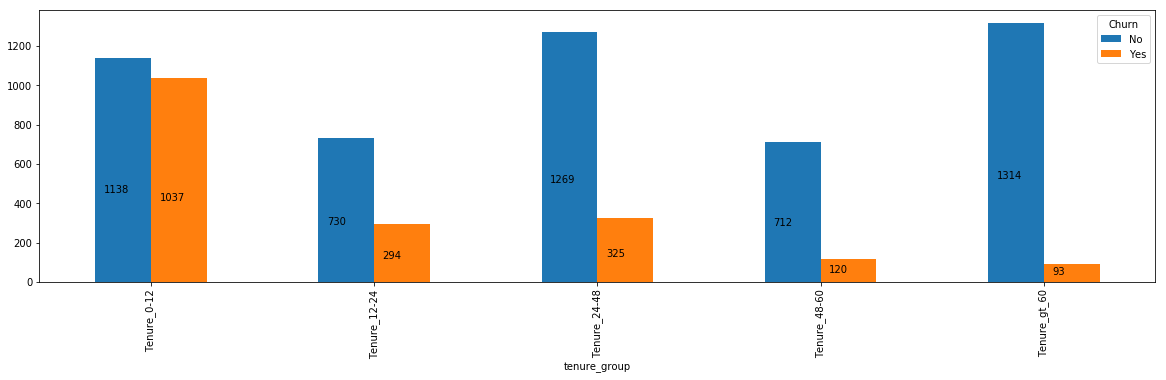

In [48]:
ax = df1.groupby(['tenure_group','Churn']).size().unstack().plot(kind='bar',figsize=(20,5))

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}'.format(height), (p.get_x()+.15*width, p.get_y()+.4*height))

In [49]:
df1[num_cols].head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


#### 3.4a. Monthly Charges and Total Charges by Tenure

In [50]:
df1.tenure_group.unique()

array(['Tenure_0-12', 'Tenure_24-48', 'Tenure_12-24', 'Tenure_gt_60',
       'Tenure_48-60'], dtype=object)

In [51]:
# Subsets to hold each tenure group

a = df1.query('tenure_group=="Tenure_0-12"')
b = df1.query('tenure_group=="Tenure_12-24"')
c = df1.query('tenure_group=="Tenure_24-48"')
d = df1.query('tenure_group=="Tenure_48-60"')
e = df1.query('tenure_group=="Tenure_gt_60"')
a[['tenure_group','MonthlyCharges','TotalCharges']].head()

,tenure_group,MonthlyCharges,TotalCharges
0,Tenure_0-12,29.85,29.85
2,Tenure_0-12,53.85,108.15
4,Tenure_0-12,70.70,151.65
5,Tenure_0-12,99.65,820.50
7,Tenure_0-12,29.75,301.90


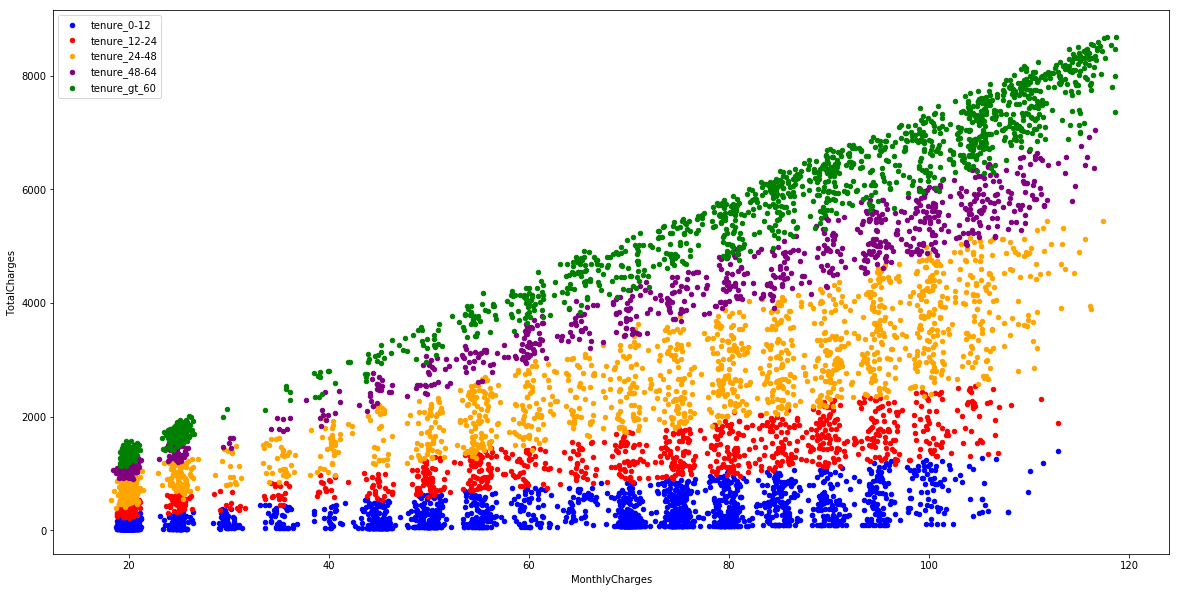

In [52]:
ax = a.plot(kind="scatter"
              ,x='MonthlyCharges'
              ,y='TotalCharges'
              ,color="b"
              ,label = 'tenure_0-12')

b.plot(kind="scatter"
              ,x='MonthlyCharges'
              ,y='TotalCharges'
              ,color="r"
              ,label = 'tenure_12-24'
              ,ax=ax)
c.plot(kind="scatter"
              ,x='MonthlyCharges'
              ,y='TotalCharges'
              ,color="orange"
              ,label = 'tenure_24-48'
              ,ax=ax)
d.plot(kind="scatter"
              ,x='MonthlyCharges'
              ,y='TotalCharges'
              ,color="purple"
              ,label = 'tenure_48-64'
              ,ax=ax)
e.plot(kind="scatter"
              ,x='MonthlyCharges'
              ,y='TotalCharges'
              ,color="g"
              ,label = 'tenure_gt_60'
              ,ax=ax
              ,figsize=(20,10))
plt.show()

In [53]:
# fig, ax = plt.subplots()
# ax.plot(x, np.sin(x), '-b', label='Sine')
# ax.plot(x, np.cos(x), '--r', label='Cosine')
# ax.axis('equal')
# leg = ax.legend();

#### 3.4b. Monthly Charges and Total Charges by Churn groups

In [54]:
a = df1.query('Churn=="No"')
b = df1.query('Churn=="Yes"')
a[['Churn','MonthlyCharges','TotalCharges']].head()

,Churn,MonthlyCharges,TotalCharges
0,No,29.85,29.85
1,No,56.95,1889.50
3,No,42.30,1840.75
6,No,89.10,1949.40
7,No,29.75,301.90


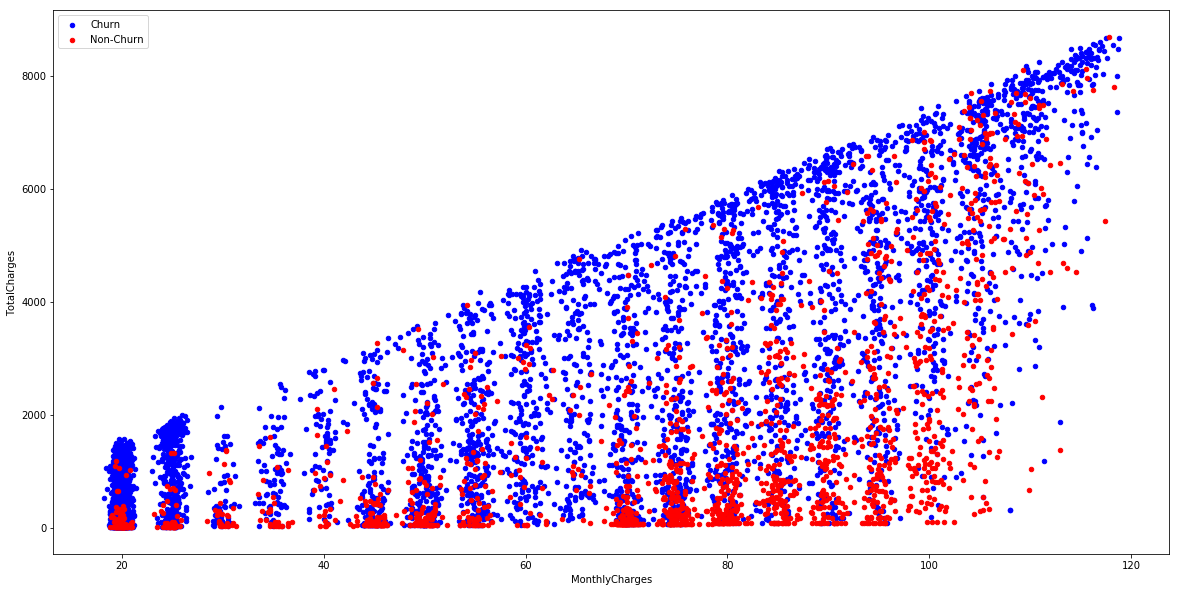

In [55]:
ax = a.plot(kind="scatter"
              ,x='MonthlyCharges'
              ,y='TotalCharges'
              ,color="b"
              ,label='Churn')
b.plot(kind="scatter"
              ,x='MonthlyCharges'
              ,y='TotalCharges'
              ,color="r"
              ,label='Non-Churn'
              ,ax=ax,figsize=(20,10))
plt.show()

#### 3.4a Average Monthly charges by tenure groups

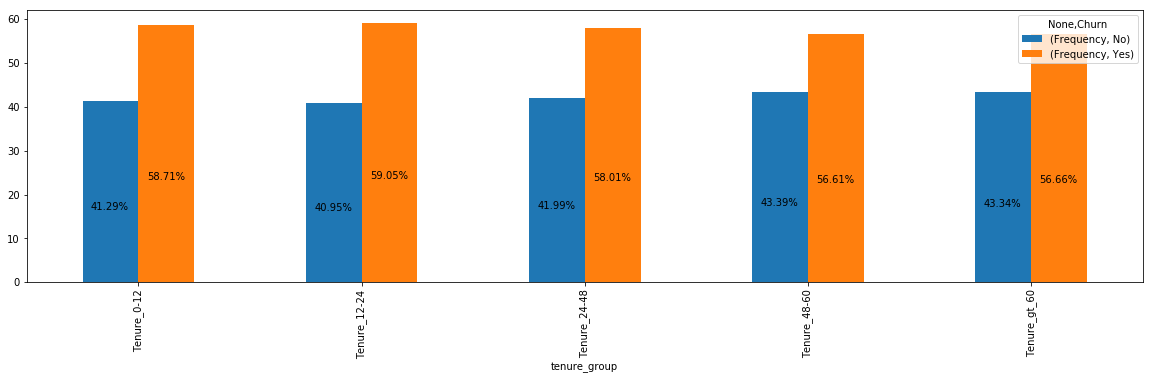

In [56]:
a = df1.groupby(['tenure_group','Churn'])['MonthlyCharges'].agg({'Frequency':'mean'});a
final = a.groupby(level=0).apply(lambda x:x/float(x.sum())*100);final
ax = final.unstack().plot(kind='bar',figsize=(20,5))
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.2f}%'.format(height), (p.get_x()+.15*width, p.get_y()+.4*height))

#### 3.4b Average Total charges by tenure groups

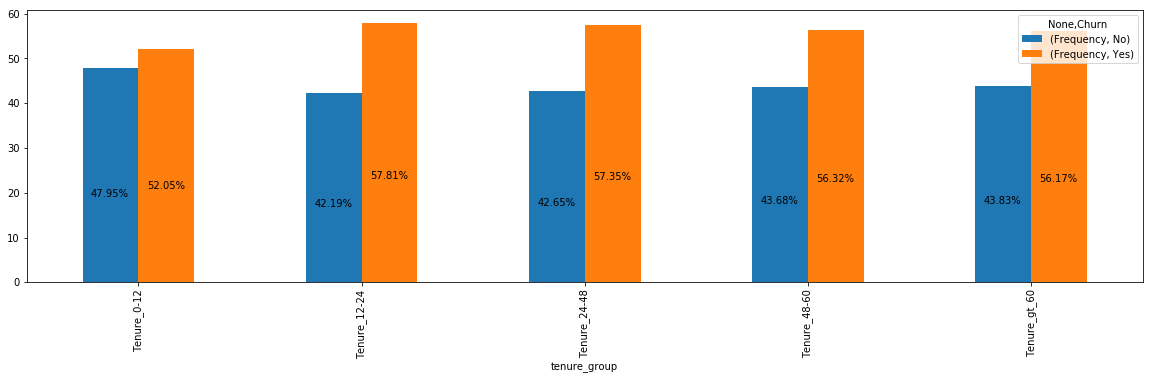

In [57]:
a = df1.groupby(['tenure_group','Churn'])['TotalCharges'].agg({'Frequency':'mean'});a
final = a.groupby(level=0).apply(lambda x:x/float(x.sum())*100);final
ax = final.unstack().plot(kind='bar',figsize=(20,5))
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.2f}%'.format(height), (p.get_x()+.15*width, p.get_y()+.4*height))

In [58]:
print('#'*127)
print('#'*127)
print('#'*127)

###############################################################################################################################
###############################################################################################################################
###############################################################################################################################


### 4.Data preprocessing

In [59]:
df1 = df.copy()

In [60]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Tenure_0-12
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,Tenure_24-48
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Tenure_0-12


In [61]:
df1 = df1.drop(columns= 'tenure_group',axis=1)

In [62]:
df1.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'], dtype='object')

In [63]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

ID_col = ['customerID']   # Customer ID col
target_col = ['Churn']   # target col

# Categorical columns
cat_cols = df1.nunique()[df1.nunique() < 6].keys().tolist()
cat_cols = [x for x in cat_cols if x not in target_col]

# Numerical columns
num_cols = [x for x in df1.columns if x not in cat_cols + target_col + ID_col]

# Binary columns
bin_cols = df1.nunique()[df1.nunique() == 2].keys().tolist()

# Multiple columns
mul_cols = [x for x in cat_cols if x not in bin_cols]


In [64]:
bin_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'Churn']

In [65]:
# label encoding

le = LabelEncoder()
for i in bin_cols:
    df1[i] = le.fit_transform(df1[i])

In [66]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Tenure_0-12
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,Tenure_24-48
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Tenure_0-12


In [67]:
df1.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1


In [68]:
# Duplicating columns for multi value columns

df1 = pd.get_dummies(data=df1, columns=mul_cols)
df1.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,0,1,0,0,0,0,1,29.85,29.85,0,0,1,0,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,1,0,0,0,34,1,1,0,1,0,0,0,0,56.95,1889.50,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,1,0,0,0,2,1,1,1,0,0,0,0,1,53.85,108.15,1,1,0,0,1,0,0,1,0,0,0,0,0,1


In [69]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Tenure_0-12
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,Tenure_24-48
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Tenure_0-12


In [70]:
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

In [71]:
df[num_cols].dtypes

tenure              int64
MonthlyCharges    float64
TotalCharges      float64
dtype: object

In [72]:
# Scaling numerical columns

std = StandardScaler()
scaled = std.fit_transform(df1[num_cols]);scaled
scaled = pd.DataFrame(scaled,columns=num_cols);scaled.head()


# Dropping original values merging scaled values for numerical columns
df1_backup = df1.copy()
df1 = df1.drop(columns=num_cols,axis=1)
df1 = df1.merge(scaled,left_index=True,right_index=True,how='left')

In [73]:
df1[num_cols].head()

,tenure,MonthlyCharges,TotalCharges
0,-1.280248,-1.161694,-0.994194
1,0.064303,-0.260878,-0.173740
2,-1.239504,-0.363923,-0.959649
3,0.512486,-0.747850,-0.195248
4,-1.239504,0.196178,-0.940457


In [74]:
df[num_cols].head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


In [75]:
df1.shape

(7032, 30)

In [76]:
df.shape

(7032, 22)

In [77]:
print('#'*127)
print('#'*127)
print('#'*127)

###############################################################################################################################
###############################################################################################################################
###############################################################################################################################


### 3.7 Variable summary

In [78]:
df1.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn', 'MultipleLines_No', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [79]:
summary = df1_backup[[i for i in df1_backup.columns if i not in Id_col]]
summary.head()

summary.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.504693,0.162400,0.482509,0.298493,32.421786,0.903299,0.286547,0.344852,0.343857,0.290102,0.384386,0.388367,0.592719,64.798208,2283.300441,0.265785,0.481371,0.096701,0.421928,0.343572,0.440273,0.216155,0.551052,0.209329,0.239619,0.219283,0.216297,0.336320,0.228100
std,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.452180,0.475354,0.475028,0.453842,0.486484,0.487414,0.491363,30.085974,2266.771362,0.441782,0.499688,0.295571,0.493902,0.474934,0.496455,0.411650,0.497422,0.406858,0.426881,0.413790,0.411748,0.472483,0.419637
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.587500,401.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1397.475000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.862500,3794.737500,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [80]:
print('#'*127)
print('#'*127)
print('#'*127)

###############################################################################################################################
###############################################################################################################################
###############################################################################################################################


### 3.8 Correlation matrix

In [81]:
df1_backup = df1_backup[[i for i in df1_backup.columns if i not in Id_col]]

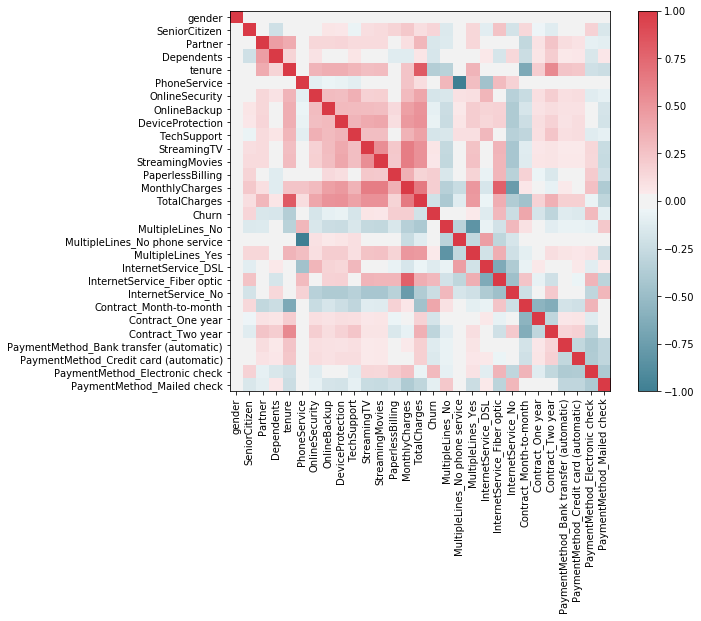

In [82]:
plt.rcParams["figure.figsize"] = [10,7]

plt.imshow(df1_backup.corr()
#            ,cmap=plt.cm.Reds
           ,cmap=sns.diverging_palette(220, 10, as_cmap=True))
plt.colorbar()
tick_marks = [i for i in range(len(df1_backup.columns))]
plt.xticks(tick_marks, df1_backup.columns, rotation='vertical')
plt.yticks(tick_marks, df1_backup.columns)
plt.show()

In [83]:
print('#'*127)
print('#'*127)
print('#'*127)

###############################################################################################################################
###############################################################################################################################
###############################################################################################################################


### 5. Model Building

#### 5.1 Baseline Model

##### Importing libraries

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score,recall_score
import statsmodels.api as sm
from yellowbrick.classifier import DiscriminationThreshold

##### Splitting the dataset

In [85]:
train,test = train_test_split(df1_backup, test_size = 0.25, random_state = 111)

In [86]:
df1.shape

(7032, 30)

In [87]:
train.shape

(5274, 29)

In [88]:
test.shape

(1758, 29)

##### Separting dependent and independent variables

In [89]:
cols = [i for i in df1.columns if i not in Id_col + target_col]

In [90]:
print(cols)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'MultipleLines_No', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [91]:
train_X = train[cols]
train_Y = train[target_col]
test_X = test[cols]
test_Y = test[target_col]

In [92]:
def telecom_churn_prediction(algorithm, training_X, testing_X, 
                           training_Y, testing_Y, cols, cf,threshold_plot):
    # model
    algorithm.fit(training_X,training_Y)
    predictions = algorithm.predict(testing_X)
    probabilities = algorithm.predict_proba(testing_X)
    
    # Coeffs
    if cf == 'coefficients':
        coefficients = pd.DataFrame(algorithm.coef_.ravel())
    elif cf == 'features':
        coefficients = pd.DataFrame(algorithm.feature_importances_)
    
    column_df = pd.DataFrame(cols)
    coef_summary = (pd.merge(coefficients,column_df,left_index=True,right_index=True,how='left'))
    coef_summary.columns = ["coefficients","features"]
    coef_summary = coef_summary.sort_values(by="coefficients", ascending=False)
    
    print(algorithm)
#     print("\nClassificaiton report: \n", classification_report(testing_Y,predictions))
    print("\nAccuracy score", accuracy_score(testing_Y,predictions))
#     print("\nConfusion matrix: \n", confusion_matrix(testing_Y,predictions))
   
    conf_matrix = confusion_matrix(testing_Y,predictions)
    
    model_roc_auc = roc_auc_score(testing_Y,predictions)

    print("\nArea under curve", model_roc_auc,"\n")
    
    fpr,tpr,thresholds = roc_curve(testing_Y,probabilities[:,1])
        
    # plot confusion matrix
    trace1 = go.Heatmap(z=conf_matrix,
                        x=["Not churn", "churn"],
                        y=["Not churn", "churn"],
                        showscale=False,
                        colorscale="Picnic",
                        name="matrix")
    # plot roc curve
    trace2 = go.Scatter(x=fpr,
                        y=tpr,
                        name = "Roc : " + str(model_roc_auc),
                        line= dict(color=('rgb(22,96,167)'),width=2))
    trace3 = go.Scatter(x=[0,1],y=[0,1],
                        line= dict(color=('rgb(205,12,24)'),width=2,dash='dot'))
    
    # plot coeffs
    trace4 = go.Bar(x=coef_summary['features'],
                    y=coef_summary["coefficients"],
                    name="coefficients",
                    marker=dict(color=coef_summary["coefficients"],colorscale="Picnic",line=dict(width=.6,color="Black")))
    
    # Sub plots
    fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                            subplot_titles=('Confusion Matrix',
                                            'Receiver operating characteristic',
                                            'Feature Importances'))    
    
    fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,1,2)
    fig.append_trace(trace3,1,2)
    fig.append_trace(trace4,2,1)
    
    fig['layout'].update(showlegend=False, title="Model performance",
                         autosize = False,height = 500,width = 800,
                         plot_bgcolor = 'rgba(240,240,240, 0.95)',
                         paper_bgcolor = 'rgba(240,240,240, 0.95)',
                         margin = dict(b = 195))
    fig["layout"]["xaxis2"].update(dict(title = "false positive rate"))
    fig["layout"]["yaxis2"].update(dict(title = "true positive rate"))
    fig["layout"]["xaxis3"].update(dict(showgrid = True,tickfont = dict(size = 10),tickangle = 90))
    py.iplot(fig)
    
    
    if threshold_plot == True:
        visualizer = DiscriminationThreshold(algorithm)
        visualizer.fit(training_X, training_Y)
        visualizer.poof()

In [93]:
logit = LogisticRegression()
logit

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [94]:
# logit  = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
#                             intercept_scaling=1, max_iter=100, multi_class='warn',
#                             n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
#                             tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Accuracy score 0.8031854379977247

Area under curve 0.7233213159080667 

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3           -      ]



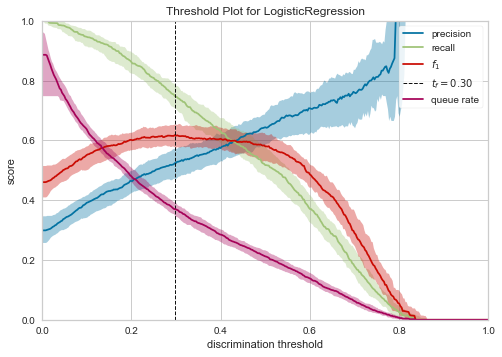

In [95]:
telecom_churn_prediction(logit,train_X,test_X,train_Y,test_Y,cols,"coefficients",threshold_plot=True)

In [96]:
print('#'*127)
print('#'*127)
print('#'*127)

###############################################################################################################################
###############################################################################################################################
###############################################################################################################################


#### 5.2 Synthetic Minority Oversampling Technique(SMOTE)

* Randomly pick a point from the minority class.
* Compute the k-nearest neighbors (for some pre-specified k) for this point.
* Add k new points somewhere between the chosen point and each of its neighbors

In [97]:
from imblearn.over_sampling import SMOTE

In [98]:
cols = [i for i in df1_backup.columns if i not in Id_col + target_col]

In [99]:
smote_X = df1_backup[cols]
smote_Y = df1_backup[target_col]

In [100]:
smote_X.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,1,0,0,0,0,1,29.85,29.85,0,1,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,1,0,1,0,0,0,0,56.95,1889.50,1,0,0,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,1,0,0,0,0,1,53.85,108.15,1,0,0,1,0,0,1,0,0,0,0,0,1


In [101]:
smote_Y.head(3)

,Churn
0,0
1,0
2,1


##### Split train and test data

In [102]:
smote_train_X, smote_test_X, smote_train_Y, smote_test_Y = train_test_split(smote_X, smote_Y, test_size =.3, random_state=123)

In [103]:
smote_train_X.shape

(4922, 28)

In [104]:
smote_test_X.shape

(2110, 28)

In [105]:
smote_train_Y.shape

(4922, 1)

In [106]:
smote_test_Y.shape

(2110, 1)

#### Oversampling minority class using smote

In [107]:
os = SMOTE(random_state=0)

In [108]:
os

SMOTE(k_neighbors=5, kind='deprecated', m_neighbors='deprecated', n_jobs=1,
   out_step='deprecated', random_state=0, ratio=None,
   sampling_strategy='auto', svm_estimator='deprecated')

In [109]:
os_smote_X,os_smote_Y = os.fit_sample(smote_train_X,smote_train_Y)

In [110]:
os_smote_X

array([[1.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [1.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.65775869, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.69620841, 0.30379159, 0.30379159, ..., 0.        , 1.        ,
        0.        ]])

In [111]:
os_smote_Y

array([1, 1, 0, ..., 1, 1, 1])

In [112]:
os_smote_X = pd.DataFrame(data=os_smote_X,columns=cols);os_smote_X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1.0,0.0,0.0,0.0,7.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,99.80,673.25,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,79.35,79.35,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,27.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.00,1291.35,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,1.0,1.0,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.55,3309.25,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,72.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.80,1874.30,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [113]:
os_smote_Y = pd.DataFrame(data=os_smote_Y, columns = target_col);os_smote_Y.head()

,Churn
0,1
1,1
2,0
3,1
4,0


In [114]:
os_smote_Y.groupby('Churn').size()

Churn
0    3679
1    3679
dtype: int64

In [115]:
os_smote_Y.shape

(7358, 1)

In [116]:
df1_backup.groupby('Churn').size()

Churn
0    5163
1    1869
dtype: int64

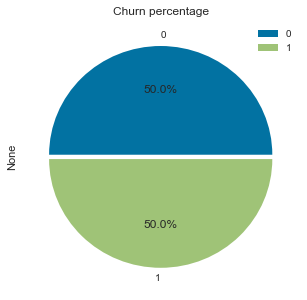

In [117]:
a = round(os_smote_Y.groupby('Churn').size()/os_smote_Y.shape[0],3) * 100
a.plot(kind='pie', figsize=(5,5),autopct = '%1.1f%%',explode = (0.02, 0.02),colors=['b','g'])
plt.title('Churn percentage')
plt.legend()
plt.show()

In [118]:
logit

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [119]:
logit_smote = LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Accuracy score 0.7485779294653014

Area under curve 0.6128404043005216 

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3           -      ]



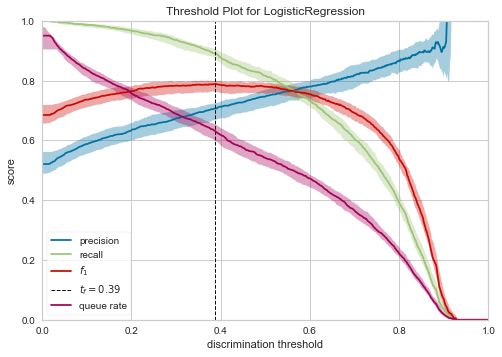

In [120]:
telecom_churn_prediction(logit_smote,os_smote_X,test_X,os_smote_Y,test_Y,cols,"coefficients",threshold_plot=True)

In [121]:
print('#'*127)
print('#'*127)
print('#'*127)

###############################################################################################################################
###############################################################################################################################
###############################################################################################################################


#### 5.3 Recursive Feature Elimination

Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [122]:
from sklearn.feature_selection import RFE

In [123]:
logit = LogisticRegression()

In [124]:
os_smote_Y.values.ravel()

array([1, 1, 0, ..., 1, 1, 1])

In [125]:
rfe = RFE(logit,10)
rfe = rfe.fit(os_smote_X,os_smote_Y.values.ravel())

In [126]:
rfe

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
  n_features_to_select=10, step=1, verbose=0)

In [127]:
rfe.support_

array([False, False, False, False, False, False,  True,  True, False,
        True, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True, False, False,  True,
        True])

In [128]:
rfe.ranking_

array([13, 10,  4,  9, 14,  6,  1,  1,  8,  1,  5,  7,  2, 18, 19, 11, 17,
       12, 16,  1,  1,  1,  1,  1, 15,  3,  1,  1])

In [129]:
# Idenitified columns using RFE

idc_rfe = pd.DataFrame({"rfe_support" : rfe.support_,
                        "columns": [i for i in df1.columns if i not in Id_col + target_col], 
                        "rfe_ranking": rfe.ranking_})
cols = idc_rfe[idc_rfe["rfe_support"] == True]["columns"].tolist()

In [130]:
idc_rfe

,rfe_support,columns,rfe_ranking
0,False,gender,13
1,False,SeniorCitizen,10
2,False,Partner,4
3,False,Dependents,9
4,False,PhoneService,14
5,False,OnlineSecurity,6
6,True,OnlineBackup,1
7,True,DeviceProtection,1
8,False,TechSupport,8
9,True,StreamingTV,1


In [131]:
cols

['OnlineBackup',
 'DeviceProtection',
 'StreamingTV',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'MonthlyCharges',
 'TotalCharges']

#### Separting test and train data

In [132]:
train_rf_X = os_smote_X[cols]
train_rf_Y = os_smote_Y
test_rf_X = test[cols]
test_rf_Y = test[target_col]

In [133]:
logit_rfe= LogisticRegression()
logit_rfe

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Accuracy score 0.7377701934015927

Area under curve 0.7493481619777248 

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3           -      ]



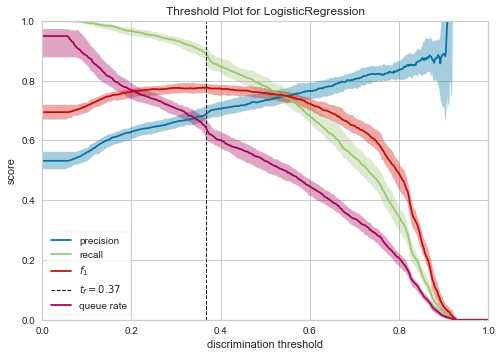

In [134]:
telecom_churn_prediction(logit_rfe,train_rf_X,test_rf_X,train_rf_Y,test_rf_Y,cols,"coefficients",threshold_plot=True)

In [135]:
print('#'*127)
print('#'*127)
print('#'*127)

###############################################################################################################################
###############################################################################################################################
###############################################################################################################################


#### 5.4 Univariate Selection

* Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)
* uses the chi squared (chi^2) statistical test for non-negative features to select the best features

In [136]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [137]:
# Select columns
cols = [i for i in df1.columns if i not in Id_col + target_col]


# Dataframe with non negative values
df_x = df1_backup[cols]
df_y = df1_backup[target_col]


# fit model with k=3
select = SelectKBest(score_func=chi2,k=3)
fit = select.fit(df_x,df_y)

# Summarize scores
print("scores:")
print(fit.scores_)

print("\npvalues:")
print(fit.pvalues_)

scores:
[2.54297062e-01 1.33482766e+02 8.18577694e+01 1.31271509e+02
 9.29483891e-02 1.47165601e+02 3.12098318e+01 2.02160070e+01
 1.35439602e+02 1.73206148e+01 1.59306111e+01 1.04979224e+02
 3.88864216e+00 8.68247305e-01 6.51465136e+00 7.11376111e+01
 3.72082851e+02 2.85475152e+02 5.16714004e+02 1.76608724e+02
 4.86223101e+02 7.66190658e+01 9.99725387e+01 4.24113152e+02
 4.47251434e+01 1.63773281e+04 3.65307468e+03 6.29630810e+05]

pvalues:
[6.14065505e-001 7.08954608e-031 1.46240915e-019 2.15953960e-030
 7.60461827e-001 7.21988253e-034 2.31590182e-008 6.91717063e-006
 2.64595220e-031 3.15742928e-005 6.57073922e-005 1.23423173e-024
 4.86137123e-002 3.51440986e-001 1.06989295e-002 3.33158163e-017
 6.58713045e-083 4.81399951e-064 2.19511926e-114 2.66631661e-040
 9.45428638e-108 2.07328356e-018 1.54524820e-023 3.10584857e-094
 2.26727030e-011 0.00000000e+000 0.00000000e+000 0.00000000e+000]


In [138]:
# Create dataframe

score = pd.DataFrame({"features":cols,
                      "scores":fit.scores_,
                      "pvalues":fit.pvalues_})

score = score.sort_values(by='scores',ascending=False)

In [139]:
score

,features,scores,pvalues
27,TotalCharges,629630.810349,0.000000e+00
25,tenure,16377.328093,0.000000e+00
26,MonthlyCharges,3653.074681,0.000000e+00
18,Contract_Month-to-month,516.714004,2.195119e-114
20,Contract_Two year,486.223101,9.454286e-108
23,PaymentMethod_Electronic check,424.113152,3.105849e-94
16,InternetService_Fiber optic,372.082851,6.587130e-83
17,InternetService_No,285.475152,4.814000e-64
19,Contract_One year,176.608724,2.666317e-40
5,OnlineSecurity,147.165601,7.219883e-34


In [140]:
# Creating new label for categorical and numerical columns

score["feature_type"] = np.where(score["features"].isin(num_cols), "Numerical", "Categorical")
score.head()

,features,scores,pvalues,feature_type
27,TotalCharges,629630.810349,0.000000e+00,Numerical
25,tenure,16377.328093,0.000000e+00,Numerical
26,MonthlyCharges,3653.074681,0.000000e+00,Numerical
18,Contract_Month-to-month,516.714004,2.195119e-114,Categorical
20,Contract_Two year,486.223101,9.454286e-108,Categorical


In [141]:
x=score[score["feature_type"]=="Categorical"]["features"]
x

18                    Contract_Month-to-month
20                          Contract_Two year
23             PaymentMethod_Electronic check
16                InternetService_Fiber optic
17                         InternetService_No
19                          Contract_One year
5                              OnlineSecurity
8                                 TechSupport
1                               SeniorCitizen
3                                  Dependents
11                           PaperlessBilling
22      PaymentMethod_Credit card (automatic)
2                                     Partner
21    PaymentMethod_Bank transfer (automatic)
15                        InternetService_DSL
24                 PaymentMethod_Mailed check
6                                OnlineBackup
7                            DeviceProtection
9                                 StreamingTV
10                            StreamingMovies
14                          MultipleLines_Yes
12                           Multi

In [142]:
# Plot

trace = go.Scatter(x=score[score["feature_type"] == "Categorical"]["features"],
                   y=score[score["feature_type"] == "Categorical"]["scores"],
                   name="Categorical", 
                   mode = "lines+markers",
                   marker=dict(color='red', line=dict(width=1))
                  )

trace1 = go.Bar(x=score[score["feature_type"]=="Numerical"]["features"],
                y=score[score["feature_type"]=="Numerical"]["scores"],
                name="Numerical",
                marker=dict(color='royalblue', line=dict(width=1)),
                xaxis="x2",
                yaxis="y2"
               )

layout = go.Layout(dict(title = "Scores for Categorical & Numerical features",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     tickfont = dict(size =10),
                                     domain=[0, 0.7],
                                     tickangle = 90,zerolinewidth=1,
                                     ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "scores",
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        margin = dict(b=200),
                        xaxis2=dict(domain=[0.8, 1],tickangle = 90,
                                    gridcolor = 'rgb(255, 255, 255)'),
                        yaxis2=dict(anchor='x2',gridcolor = 'rgb(255, 255, 255)')
                        )
                  )

data=[trace,trace1]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

In [143]:
print('#'*127)
print('#'*127)
print('#'*127)

###############################################################################################################################
###############################################################################################################################
###############################################################################################################################


#### 5.5 Decision Tree Visualization

* using top three numerical features

In [144]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import tree
from graphviz import Source
from IPython.display import SVG,display

In [145]:
# top 3 categorical features
features_cat = score[score["feature_type"]=="Categorical"]["features"][:3].tolist()

# top 3 categorical features
features_num = score[score["feature_type"]=="Numerical"]["features"][:3].tolist()

In [146]:
features_cat

['Contract_Month-to-month',
 'Contract_Two year',
 'PaymentMethod_Electronic check']

In [147]:
features_num

['TotalCharges', 'tenure', 'MonthlyCharges']

In [148]:
#Function attributes
#columns        - selected columns
#maximum_depth  - depth of tree
#criterion_type - ["gini" or "entropy"]
#split_type     - ["best" or "random"]
#Model Performance - True (gives model output)

def plot_decision_tree(columns,maximum_depth,criterion_type,split_type,model_performance=None):
    
    # separting dependent and independent variables
    dtc_x = df_x[columns]
    dtc_y = df_y[target_col]
    
    # model
    dt_classifier = DecisionTreeClassifier(max_depth=maximum_depth,
                                           splitter=split_type,
                                           criterion = criterion_type)
    dt_classifier.fit(dtc_x,dtc_y)
    
    
    #plot deicision tree
    graph = Source(tree.export_graphviz(dt_classifier,
                                        out_file=None,
                                        rounded=True,
                                        proportion=False,
                                        feature_names=columns,
                                        precision=2,
                                        class_names=["Not churn", "Churn"],
                                        filled=True)
                  )
    
    
    # model performance
    if model_performance == True:
        telecom_churn_prediction(dt_classifier,
                                 dtc_x,
                                 test_X[columns],
                                 dtc_y,
                                 test_Y,
                                 columns,
                                 "features",
                                 threshold_plot=True)
#     display(graph)   

In [149]:
# plot_decison_tree(columns,maximum_depth,criterion_type,split_type,model_performance=None)
plot_decision_tree(features_num,3,"gini","best")

In [150]:
# import os
# os.environ["PATH"] += os.pathsep + r'C:\Users\athiq.ahmed\AppData2\Local\Continuum\anaconda3\Lib\site-packages\graphviz'

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Accuracy score 0.7610921501706485

Area under curve 0.6947675915792185 

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3           -      ]



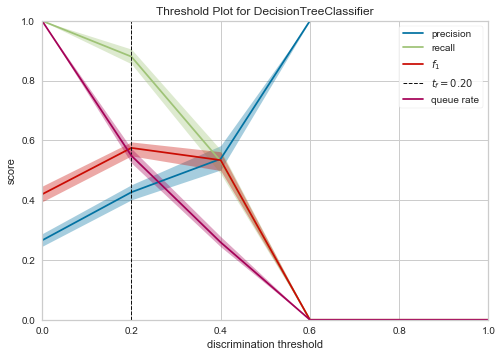

In [151]:
plot_decision_tree(features_cat,3,"entropy","best",model_performance = True)

In [152]:
# import os
# os.environ["PATH"] += os.pathsep + 'C:/Users/athiq.ahmed/AppData2/Local/Continuum/anaconda3/Lib/site-packages'
# # C:\Users\athiq.ahmed\AppData2\Local\Continuum\anaconda3\Lib\site-packages

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Accuracy score 0.7559726962457338

Area under curve 0.6060709457284491 

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3           -      ]



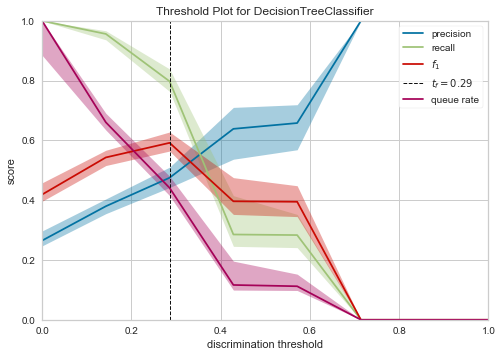

In [153]:
#using contract,tenure and paperless billing variables
columns = ['tenure','Contract_Month-to-month', 'PaperlessBilling',
           'Contract_One year', 'Contract_Two year']

plot_decision_tree(columns,3,"gini","best",model_performance= True)



# dtc_x = df_x[columns]
# dtc_y = df_y[target_col]

# # model
# dt_classifier = DecisionTreeClassifier()
# dt_classifier.fit(dtc_x,dtc_y)


# # dtree=DecisionTreeClassifier()
# # dtree.fit(df,y)

# from sklearn.externals.six import StringIO  
# from IPython.display import Image  
# from sklearn.tree import export_graphviz
# import pydotplus
# dot_data = StringIO()
# export_graphviz(dt_classifier, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True)
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# Image(graph.create_png())

In [154]:
print('#'*127)
print('#'*127)
print('#'*127)

###############################################################################################################################
###############################################################################################################################
###############################################################################################################################


### 5.6 KNN Classifier

* Applying KNN algorithm to smote oversampled data

In [155]:
def telecom_churn_prediction_alg(algorithm,training_x,testing_x,
                                 training_y,testing_y,threshold_plot = True) :
    
    #model
    algorithm.fit(training_x,training_y)
    predictions   = algorithm.predict(testing_x)
    probabilities = algorithm.predict_proba(testing_x)
    
    print (algorithm)
    print ("\n Classification report : \n",classification_report(testing_y,predictions))
    print ("Accuracy Score   : ",accuracy_score(testing_y,predictions))
    #confusion matrix
    conf_matrix = confusion_matrix(testing_y,predictions)
    #roc_auc_score
    model_roc_auc = roc_auc_score(testing_y,predictions) 
    print ("Area under curve : ",model_roc_auc)
    fpr,tpr,thresholds = roc_curve(testing_y,probabilities[:,1])
     
    #plot roc curve
    trace1 = go.Scatter(x = fpr,y = tpr,
                        name = "Roc : " + str(model_roc_auc),
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2),
                       )
    trace2 = go.Scatter(x = [0,1],y=[0,1],
                        line = dict(color = ('rgb(205, 12, 24)'),width = 2,
                        dash = 'dot'))
    
    #plot confusion matrix
    trace3 = go.Heatmap(z = conf_matrix ,x = ["Not churn","Churn"],
                        y = ["Not churn","Churn"],
                        showscale  = False,colorscale = "Blues",name = "matrix",
                        xaxis = "x2",yaxis = "y2"
                       )
    
    layout = go.Layout(dict(title="Model performance" ,
                            autosize = False,height = 500,width = 800,
                            showlegend = False,
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(title = "false positive rate",
                                         gridcolor = 'rgb(255, 255, 255)',
                                         domain=[0, 0.6],
                                         ticklen=5,gridwidth=2),
                            yaxis = dict(title = "true positive rate",
                                         gridcolor = 'rgb(255, 255, 255)',
                                         zerolinewidth=1,
                                         ticklen=5,gridwidth=2),
                            margin = dict(b=200),
                            xaxis2=dict(domain=[0.7, 1],tickangle = 90,
                                        gridcolor = 'rgb(255, 255, 255)'),
                            yaxis2=dict(anchor='x2',gridcolor = 'rgb(255, 255, 255)')
                           )
                  )
    data = [trace1,trace2,trace3]
    fig = go.Figure(data=data,layout=layout)
    
    py.iplot(fig)
    
    if threshold_plot == True : 
        visualizer = DiscriminationThreshold(algorithm)
        visualizer.fit(training_x,training_y)
        visualizer.poof()

    
# from sklearn.neighbors import KNeighborsClassifier
# knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
#                            metric_params=None, n_jobs=None, n_neighbors=5, p=2,
#                            weights='uniform')
# telecom_churn_prediction_alg(knn,os_smote_X,test_X,
#                              os_smote_Y,test_Y,threshold_plot = True)

In [156]:
from sklearn.neighbors import KNeighborsClassifier

In [157]:
Knn = KNeighborsClassifier();Knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

 Classification report : 
               precision    recall  f1-score   support

           0       0.36      0.04      0.08      1268
           1       0.24      0.79      0.37       490

   micro avg       0.25      0.25      0.25      1758
   macro avg       0.30      0.42      0.23      1758
weighted avg       0.32      0.25      0.16      1758

Accuracy Score   :  0.25312855517633676
Area under curve :  0.41902079443764884


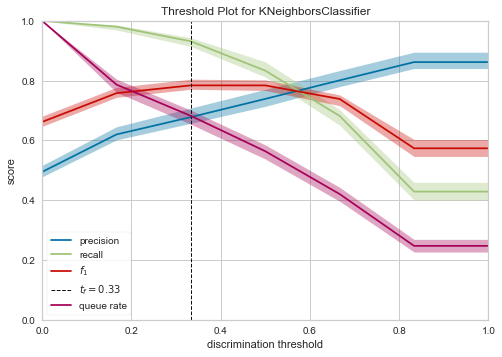

In [158]:
# telecom_churn_prediction_alg(algorithm,training_x,testing_x,training_y,testing_y,threshold_plot=True)
telecom_churn_prediction_alg(Knn, os_smote_X, test_X, os_smote_Y, test_Y,threshold_plot=True)

### 5.7. Vizualising a decision tree from random forest classifier

In [159]:
columns

['tenure',
 'Contract_Month-to-month',
 'PaperlessBilling',
 'Contract_One year',
 'Contract_Two year']

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Accuracy score 0.7764505119453925

Area under curve 0.625275220498294 

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3           -      ]



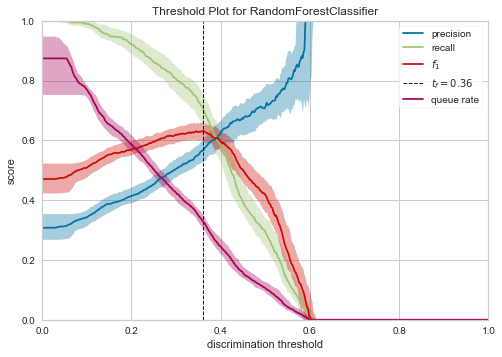

In [160]:
from sklearn.ensemble import RandomForestClassifier

#function attributes
#columns  - column used
#nf_estimators   - The number of trees in the forest.
#estimated_tree  - tree number to be displayed
#maximum_depth   - depth of the tree
#criterion_type  - split criterion type ["gini" or "entropy"]
#Model performance - prints performance of model


def plot_tree_randomforest(columns,nf_estimators,estimated_tree,maximum_depth,criterion_type,model_performance=None):
    dataframe = df1_backup[columns+target_col].copy()
    
    # train and test datasets
    rf_x = dataframe[[i for i in columns if i not in target_col]]
    rf_y = dataframe[target_col]
    
    # random forest classifier
    rfc = RandomForestClassifier(n_estimators=nf_estimators,max_depth = maximum_depth,criterion = criterion_type)
    rfc.fit(rf_x,rf_y)
    
    
    estimated_tree = rfc.estimators_[estimated_tree]
    
    
    graph = Source(tree.export_graphviz(estimated_tree,
                                        out_file=None,
                                        rounded=True,
                                        proportion=False,
                                        feature_names=columns,
                                        precision=2,
                                        class_names=["Not churn","churn"],
                                        filled=True))
    
#     display(graph)
    
    # model performance
    if model_performance == True:
        telecom_churn_prediction(rfc,rf_x,test_X[columns],rf_y,test_Y,columns,"features",threshold_plot=True)
        
cols1 = [i for i in train_X.columns if i not in target_col + Id_col]
plot_tree_randomforest(cols1,100,99,3,"entropy",True)

### 5.8 Random forest classifier

* A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement .
* Below are the trees produced by random forest model with 10 estimated trees with maximum depth of three for each tree. Each tree produced is slightly different from other.

In [161]:
#making 10 trees with random forest.
n = np.arange(0,10).tolist()
cols1 = [ i for i in train_X.columns if i not in target_col + Id_col] 
for i in n :
    plot_tree_randomforest(cols1,10,i,3,"entropy",model_performance=False)

In [162]:
#making 10 trees with random forest for columns 
#selected from recursive feature elimination

n = np.arange(0,10).tolist()
cols = idc_rfe[idc_rfe["rfe_support"] == True]["columns"].tolist() 
for i in n :
    plot_tree_randomforest(cols,10,i,3,"gini",model_performance=False)

### 5.9 Gaussian Naive Bayes

GaussianNB(priors=None, var_smoothing=1e-09)

 Classification report : 
               precision    recall  f1-score   support

           0       0.72      1.00      0.84      1268
           1       0.00      0.00      0.00       490

   micro avg       0.72      0.72      0.72      1758
   macro avg       0.36      0.50      0.42      1758
weighted avg       0.52      0.72      0.60      1758

Accuracy Score   :  0.7212741751990899
Area under curve :  0.5


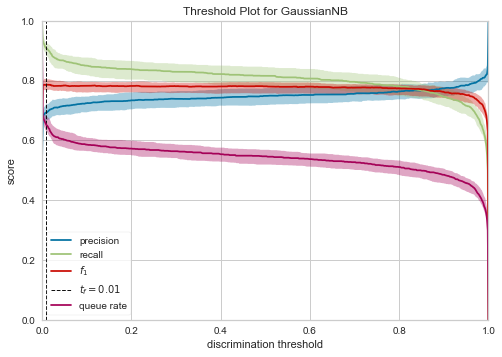

In [163]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB(priors=None)


telecom_churn_prediction_alg(gnb,os_smote_X,test_X,os_smote_Y,test_Y)

### Support Vector Machine

* “Support Vector Machine” (SVM) is a supervised machine learning algorithm which can be used for both classification or regression challenges. it is mostly used in classification problems. In this algorithm, we plot each data item as a point in n-dimensional space .where n is number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiate the two classes

In [ ]:
from sklearn.svm import SVC

#Support vector classifier
#using linear hyper plane
svc_lin  = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
               decision_function_shape='ovr', degree=3, gamma=1.0, kernel='linear',
               max_iter=-1, probability=True, random_state=None, shrinking=True,
               tol=0.001, verbose=False)

cols = [i for i in df1.columns if i not in Id_col + target_col]
telecom_churn_prediction(svc_lin,os_smote_X,test_X,os_smote_Y,test_Y,
                         cols,"coefficients",threshold_plot = False)

### 5.11 Tuning parameters for SVM

In [ ]:
#tuning parameters
#Support vector classifier
#using non-linear hyper plane("rbf")

svc_rbf  = SVC(C=1.0, kernel='rbf', 
               degree= 3, gamma=1.0, 
               coef0=0.0, shrinking=True,
               probability=True,tol=0.001,
               cache_size=200, class_weight=None,
               verbose=False,max_iter= -1,
               random_state=None)

telecom_churn_prediction_alg(svc_rbf,os_smote_X,test_X,os_smote_Y,test_Y,threshold_plot = False)

### LightGBMClassifier

In [ ]:
from lightgbm import LGBMClassifier

lgbm_c = LGBMClassifier()

cols = [i for i in df1.columns if i not in Id_col + target_col]

telecom_churn_prediction(lgbm_c,os_smote_X,test_X,os_smote_Y,test_Y,cols,"features",threshold_plot=True)

### XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier

xgc = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                    colsample_bytree=1, gamma=0, learning_rate=0.9, max_delta_step=0,
                    max_depth = 7, min_child_weight=1, missing=None, n_estimators=100,
                    n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
                    reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                    silent=True, subsample=1)

telecom_churn_prediction(xgc,os_smote_X,test_X,os_smote_Y,test_Y,cols,"features",threshold_plot=True)

### 6. Model Performances

#### 6.1 Model performance metrics

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score

# gives model report in dataframe

def model_report(model,training_X,testing_X,training_Y,testing_Y,name):
    model.fit(training_X,training_Y)
    predictions  = model.predict(testing_X)
    accuracy     = accuracy_score(testing_Y,predictions)
    recallscore  = recall_score(testing_Y,predictions)
    precision    = precision_score(testing_Y,predictions)
    roc_auc      = roc_auc_score(testing_Y,predictions)
    f1score      = f1_score(testing_Y,predictions)
    kappa_metric = cohen_kappa_score(testing_Y,predictions)
    
    
    df = pd.DataFrame({"Model"            : [name],
                       "Accuracy_score"   : [accuracy],
                       "Recall_score"     : [recallscore],
                       "Precision"        : [precision],
                       "f1_score"         : [f1score],
                       "Area_under_curve" : [roc_auc],
                       "Kappa_metric"     : [kappa_metric]
                      })
    
    return df

# outputs for every model
model1 = model_report(logit,train_X,test_X,train_Y,test_Y,"Logistic Regression(Baseline Model)")
model2 = model_report(logit_smote,os_smote_X,test_X,os_smote_Y,test_Y,"Logistic Regression(SMOTE)")
model3 = model_report(logit_rfe,train_rf_X,test_rf_X,train_rf_Y,test_rf_Y,"Logistic Regression(RFE)")
decision_tree = DecisionTreeClassifier(max_depth=9,random_state=123,splitter='best',criterion = 'gini')
model4 = model_report(decision_tree,train_X,test_X,train_Y,test_Y,"Decision Tree")
model5 = model_report(Knn,os_smote_X,test_X,os_smote_Y,test_Y,"KNN Classifier")
rfc = RandomForestClassifier(n_estimators=1000,random_state=123,max_depth=9,criterion='gini')
model6 = model_report(rfc,train_X,test_X,train_Y,test_Y,"Random Forest Classifier")
model7 = model_report(gnb,os_smote_X,test_X,os_smote_Y,test_Y,"Naive Bayes")
model8 = model_report(svc_lin,os_smote_X,test_X,os_smote_Y,test_Y,"SVM Classifier linear")
model9 = model_report(svc_rbf,os_smote_X,test_X,os_smote_Y,test_Y,"SVM Classifier RBF")
model9 = model_report(lgbm_c,os_smote_X,test_X,os_smote_Y,test_Y,"LGBM Classifier")
model9 = model_report(xgc,os_smote_X,test_X,os_smote_Y,test_Y,"XGBoost Classifier")


# concat all models
model_performances = pd.concat([model1,model2,model3,model4,model5,model6,model7,model8,model9],axis=0).reset_index()

model_performances = model_performances.drop(columns= "index", axis=1)

table = ff.create_table(np.round(model_performancesrformances,4))

pv.iplot(table)

### 6.2 Compare model metrics

In [ ]:
model_performances
def output_tracer(metric,color):
    tracer = go.Bar(y=model_performances["Model"],x=model_performances[metric],orientation="h",name=metric,
                    marker=dict(line=dict(width=0.7),color=color))
    
    return tracer

layout = go.Layout(dict(title = "Model performances",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "metric",
                                     zerolinewidth=1,
                                     ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        margin = dict(l = 250),
                        height = 780
                       )
                  )

trace1  = output_tracer("Accuracy_score","#6699FF")
trace2  = output_tracer('Recall_score',"red")
trace3  = output_tracer('Precision',"#33CC99")
trace4  = output_tracer('f1_score',"lightgrey")
trace5  = output_tracer('Kappa_metric',"#FFCC99")

data = [trace1,trace2,trace3,trace4,trace5]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

### 6.3 Confusion metrics for models

In [ ]:
lst    = [logit,logit_smote,decision_tree,knn,rfc,
          gnb,svc_lin,svc_rbf,lgbm_c,xgc]

length = len(lst)

mods   = ['Logistic Regression(Baseline_model)','Logistic Regression(SMOTE)',
          'Decision Tree','KNN Classifier','Random Forest Classifier',"Naive Bayes",
          'SVM Classifier Linear','SVM Classifier RBF', 'LGBM Classifier',
          'XGBoost Classifier']

fig = plt.figure(figsize=(13,15))
fig.set_facecolor("#F3F3F3")
for i,j,k in itertools.zip_longest(lst,range(length),mods) :
    plt.subplot(4,3,j+1)
    predictions = i.predict(test_X)
    conf_matrix = confusion_matrix(predictions,test_Y)
    sns.heatmap(conf_matrix,annot=True,fmt = "d",square = True,
                xticklabels=["not churn","churn"],
                yticklabels=["not churn","churn"],
                linewidths = 2,linecolor = "w",cmap = "Set1")
    plt.title(k,color = "b")
    plt.subplots_adjust(wspace = .3,hspace = .3)

### 6.4 ROC-curves for models

In [ ]:
lst    = [logit,logit_smote,decision_tree,knn,rfc,
          gnb,svc_lin,svc_rbf,lgbm_c,xgc]

length = len(lst)

mods   = ['Logistic Regression(Baseline_model)','Logistic Regression(SMOTE)',
          'Decision Tree','KNN Classifier','Random Forest Classifier',"Naive Bayes",
          'SVM Classifier Linear','SVM Classifier RBF', 'LGBM Classifier',
          'XGBoost Classifier']

plt.style.use("dark_background")
fig = plt.figure(figsize=(12,16))
fig.set_facecolor("#F3F3F3")
for i,j,k in itertools.zip_longest(lst,range(length),mods) :
    qx = plt.subplot(4,3,j+1)
    probabilities = i.predict_proba(test_X)
    predictions   = i.predict(test_X)
    fpr,tpr,thresholds = roc_curve(test_Y,probabilities[:,1])
    plt.plot(fpr,tpr,linestyle = "dotted",
             color = "royalblue",linewidth = 2,
             label = "AUC = " + str(np.around(roc_auc_score(test_Y,predictions),3)))
    plt.plot([0,1],[0,1],linestyle = "dashed",
             color = "orangered",linewidth = 1.5)
    plt.fill_between(fpr,tpr,alpha = .4)
    plt.fill_between([0,1],[0,1],color = "k")
    plt.legend(loc = "lower right",
               prop = {"size" : 12})
    qx.set_facecolor("k")
    plt.grid(True,alpha = .15)
    plt.title(k,color = "b")
    plt.xticks(np.arange(0,1,.3))
    plt.yticks(np.arange(0,1,.3))

### 6.5 Precision recall curves

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score


lst    = [logit,logit_smote,decision_tree,knn,rfc,
          gnb,svc_lin,svc_rbf,lgbm_c,xgc]

length = len(lst)

mods   = ['Logistic Regression(Baseline_model)','Logistic Regression(SMOTE)',
          'Decision Tree','KNN Classifier','Random Forest Classifier',"Naive Bayes",
          'SVM Classifier Linear','SVM Classifier RBF', 'LGBM Classifier',
          'XGBoost Classifier']

fig = plt.figure(figsize=(13,17))
fig.set_facecolor("#F3F3F3")
for i,j,k in itertools.zip_longest(lst,range(length),mods) :
    
    qx = plt.subplot(4,3,j+1)
    probabilities = i.predict_proba(test_X)
    predictions   = i.predict(test_X)
    recall,precision,thresholds = precision_recall_curve(test_Y,probabilities[:,1])
    plt.plot(recall,precision,linewidth = 1.5,
             label = ("avg_pcn : " + 
                      str(np.around(average_precision_score(test_Y,predictions),3))))
    plt.plot([0,1],[0,0],linestyle = "dashed")
    plt.fill_between(recall,precision,alpha = .2)
    plt.legend(loc = "lower left",
               prop = {"size" : 10})
    qx.set_facecolor("k")
    plt.grid(True,alpha = .15)
    plt.title(k,color = "b")
    plt.xlabel("recall",fontsize =7)
    plt.ylabel("precision",fontsize =7)
    plt.xlim([0.25,1])
    plt.yticks(np.arange(0,1,.3))

### 3.9 Visualizing data with principal components (later)

##### Method 1

In [ ]:
df1.columns

In [ ]:
df1_backup.columns

In [ ]:
X = df1_backup[[i for i in df1_backup.columns if i not in Id_col + target_col]]
Y = df1_backup[target_col]

X.head()
Y.head()

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

In [ ]:
principal_components = pca.fit_transform(X)

In [ ]:
pca.explained_variance_ratio_

In [ ]:
pca_data = pd.DataFrame(principal_components,columns = ["PC1","PC2"])

In [ ]:
pca_data.head()

In [ ]:
pca_data = pca_data.merge(Y,left_index=True,right_index=True,how="left");pca_data.head()

In [ ]:
pca_data["Churn"] = pca_data["Churn"].replace({1:"Churn",0:"Not Churn"});pca_data.head()

##### Some issue here

In [ ]:
plt.scatter(x=pca_data["PC1","PC2"], y=pca_data["Churn"])
plt.xlabel('Canonical variable 1')
plt.ylabel('Canonical variable 2')
plt.title('Scatterplot of Canonical Variables for 3 Clusters')
plt.show()

##### Method 2

##### Some issue here if df1 is used and it runs fine if df1_backpu is ran

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

X = df1[[i for i in df1.columns if i not in Id_col + target_col]]
Y = df1[target_col+Id_col]

principal_components = pca.fit_transform(X)
pca_data = pd.DataFrame(principal_components,columns = ["PC1","PC2"])
pca_data = pca_data.merge(Y,left_index=True,right_index=True,how="left")
pca_data["Churn"] = pca_data["Churn"].replace({1:"Churn",0:"Not Churn"})

In [ ]:
def pca_scatter(target,color) :
    tracer = go.Scatter(x = pca_data[pca_data["Churn"] == target]["PC1"] ,
                        y = pca_data[pca_data["Churn"] == target]["PC2"],
                        name = target,mode = "markers",
                        marker = dict(color = color,
                                      line = dict(width = .5),
                                      symbol =  "diamond-open"),
                        text = ("Customer Id : " + 
                                pca_data[pca_data["Churn"] == target]['customerID'])
                       )
    return tracer

layout = go.Layout(dict(title = "Visualising data with principal components",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "principal component 1",
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "principal component 2",
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        height = 600
                       )
                  )

In [ ]:
pca_scatter

##### Some issue here

In [ ]:
trace1 = pca_scatter("Churn",'red')
# trace2 = pca_scatter("Not Churn",'royalblue')
# data = [trace2,trace1]
# fig = go.Figure(data=data,layout=layout)
# py.iplot(fig)

### Appendix

In [ ]:
# Pie chart - Gender distribution

a = df.query('Churn=="Yes"')
b = df.query('Churn=="No"')

a.groupby(['Churn','gender']).size().plot(kind = 'pie',autopct = '%1.1f%%',explode = (0, 0),startangle=90
                                           ,colors=['b','g'], figsize=(3,3))
plt.show()

b.groupby(['Churn','gender']).size().plot(kind = 'pie',autopct = '%1.1f%%',explode = (0, 0),startangle=90
                                           ,colors=['b','g'], figsize=(3,3))
plt.show()

In [ ]:
# Stacked bar chart - Gender distribution
aggre = df.groupby(['Churn','gender'])['gender'].agg({'Frequency':'count'})
# aggre

final = aggre.groupby(level=0).apply(lambda x: x / float(x.sum())*100)
# final
ax = final.Frequency.unstack().plot.bar(stacked=True)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.1f} %'.format(height), (p.get_x()+.15*width, p.get_y()+.4*height))
plt.show()

In [ ]:
#Histogram - Monthly charges distribution for churn and non churn customers
churn.groupby('MonthlyCharges')['Churn'].size().plot()
plt.title('MonthlyCharges - Churn')
plt.show()
non_churn.groupby('MonthlyCharges')['Churn'].size().plot()
plt.title('MonthlyCharges - Non_Churn')
plt.show()

https://www.kaggle.com/pavanraj159/telecom-customer-churn-prediction/notebook